In [442]:
from database import get_items_list
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

In [443]:
all_items = []

for n in range(1, 21):
    all_items.extend(get_items_list(n, 100, "").items)

In [444]:
def wanted_items_by_usd(isUsd):
    def wanted_items(item):
        title = item.title.lower()
        desc = item.description.lower()
        text = title + " " + desc
        if (item.deleted == False and
            item.usd == isUsd and
            "macbook" in text and
            "air" not in text and
            "phone" not in text and
            # "pro" in title and
            item.price_usd > 100 and
            item.price_usd < 1400):
            return True
        return False
    return wanted_items

def calculate_prices_usd(isUsd):
    filtered_items = filter(wanted_items_by_usd(isUsd), all_items)
    filtered_items = sorted(filtered_items, key=lambda i: i.price_usd)
    # if isUsd:
    #     filtered_items *= 7 # times more items if it is USD
    
    prices_usd = []
    
    for item in filtered_items:
        prices_usd.append(item.price_usd)
        # print(item.title.ljust(100), item.price_usd)
    
    return prices_usd

def calculate_and_print_for(currency, bins):
    if currency == "USD":
        prices = calculate_prices_usd(True)
        count = len(prices)
        print("Count Items USD: ", count)
    elif currency == "ARS":
        prices = calculate_prices_usd(False)
        count = len(prices)
        print("Count Items ARS: ", count)
    elif currency == "ALL":
        prices = []
        prices += calculate_prices_usd(True)
        prices += calculate_prices_usd(False)
        count = len(prices)
        print("Count Items ALL: ", count)
    else:
        raise Exception(f"Unknown currency {currency}")
    counts, bins, bars = plt.hist(prices, bins)
    return (prices, (counts, bins, bars),)

Count Items USD:  61


2024-09-01 22:08:37.206 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=1e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000001,105.310978,109.532726,0.127082,0.100702,0.533036


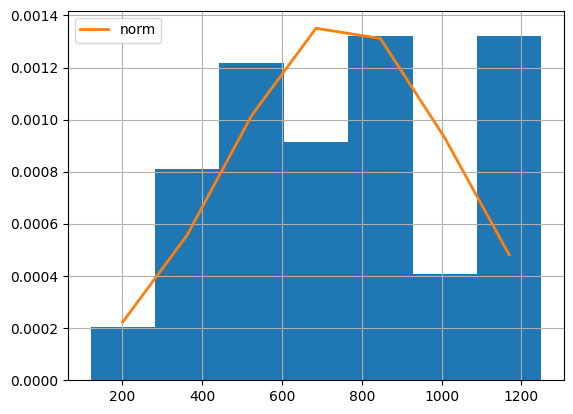

In [445]:
usd_bins = 7

items_usd, usd_hist = calculate_and_print_for("USD", usd_bins)

dists = ["norm"]

f = Fitter(items_usd,
           distributions = dists,
           bins = usd_bins)
f.fit()
f.summary()

Count Items ARS:  359


2024-09-01 22:08:37.599 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=1e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,9.228825e-07,157.08118,168.731148,0.069741,0.066909,0.076758


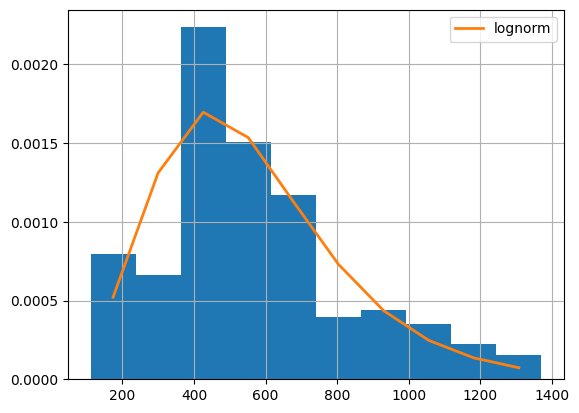

In [446]:
ars_bins = 10

items_ars, ars_hist = calculate_and_print_for("ARS", ars_bins)

dists = ["lognorm"]

f = Fitter(items_ars,
           distributions = dists,
           bins = ars_bins)
f.fit()
f.summary()